In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# adding the rows names
name_row = ['age','sex','chest_pain','blood pressure','serum_cholestrol','fasting_blood_sugar',\
               'electrocardiographic','max_heart_rate','induced_angina','ST_depression','slope','vessels','thal','diagnosis']

# read csv file with Cleveland heart diseases data
df = pd.read_csv("heart.csv", names=name_row)
df=df.iloc[1:]
df.head()

,age,sex,chest_pain,blood pressure,serum_cholestrol,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,vessels,thal,diagnosis
1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
2,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:

print(df.dtypes)

age                       int64
sex                       int64
chest_pain                int64
blood pressure            int64
serum_cholestrol          int64
fasting_blood_sugar       int64
electrocardiographic      int64
max_heart_rate            int64
induced_angina            int64
ST_depression           float64
slope                     int64
vessels                   int64
thal                      int64
diagnosis                 int64
dtype: object


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 1 to 303
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   303 non-null    int64  
 1   sex                   303 non-null    int64  
 2   chest_pain            303 non-null    int64  
 3   blood pressure        303 non-null    int64  
 4   serum_cholestrol      303 non-null    int64  
 5   fasting_blood_sugar   303 non-null    int64  
 6   electrocardiographic  303 non-null    int64  
 7   max_heart_rate        303 non-null    int64  
 8   induced_angina        303 non-null    int64  
 9   ST_depression         303 non-null    float64
 10  slope                 303 non-null    int64  
 11  vessels               303 non-null    int64  
 12  thal                  303 non-null    int64  
 13  diagnosis             303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Visualizing the data set 

1    165
0    138
Name: diagnosis, dtype: int64


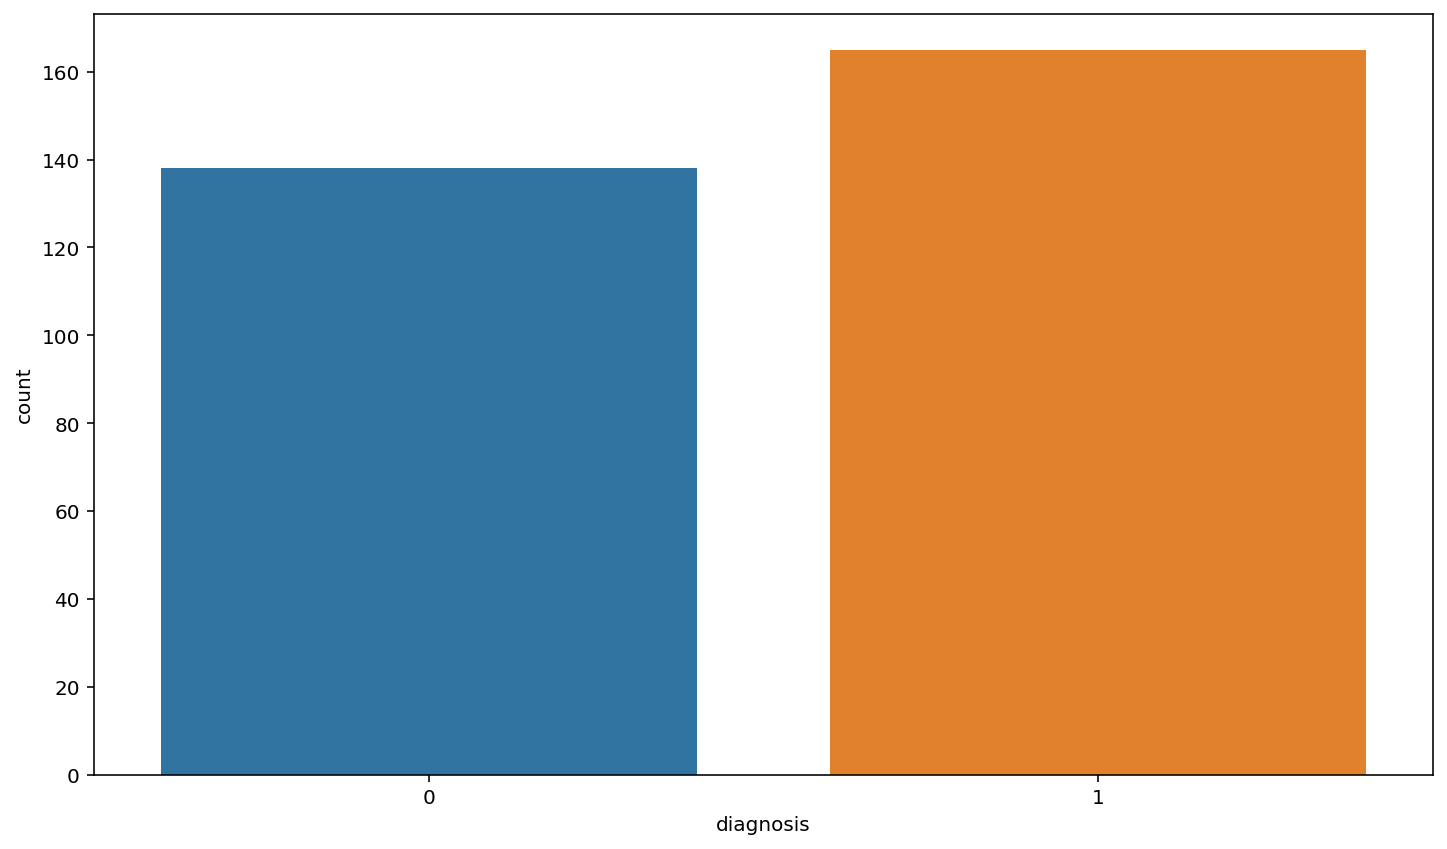

In [5]:
y=df['diagnosis']

sns.countplot(y)
temp=df.diagnosis.value_counts()
print(temp)

Text(0.5, 1.0, 'relation between gender and disease')

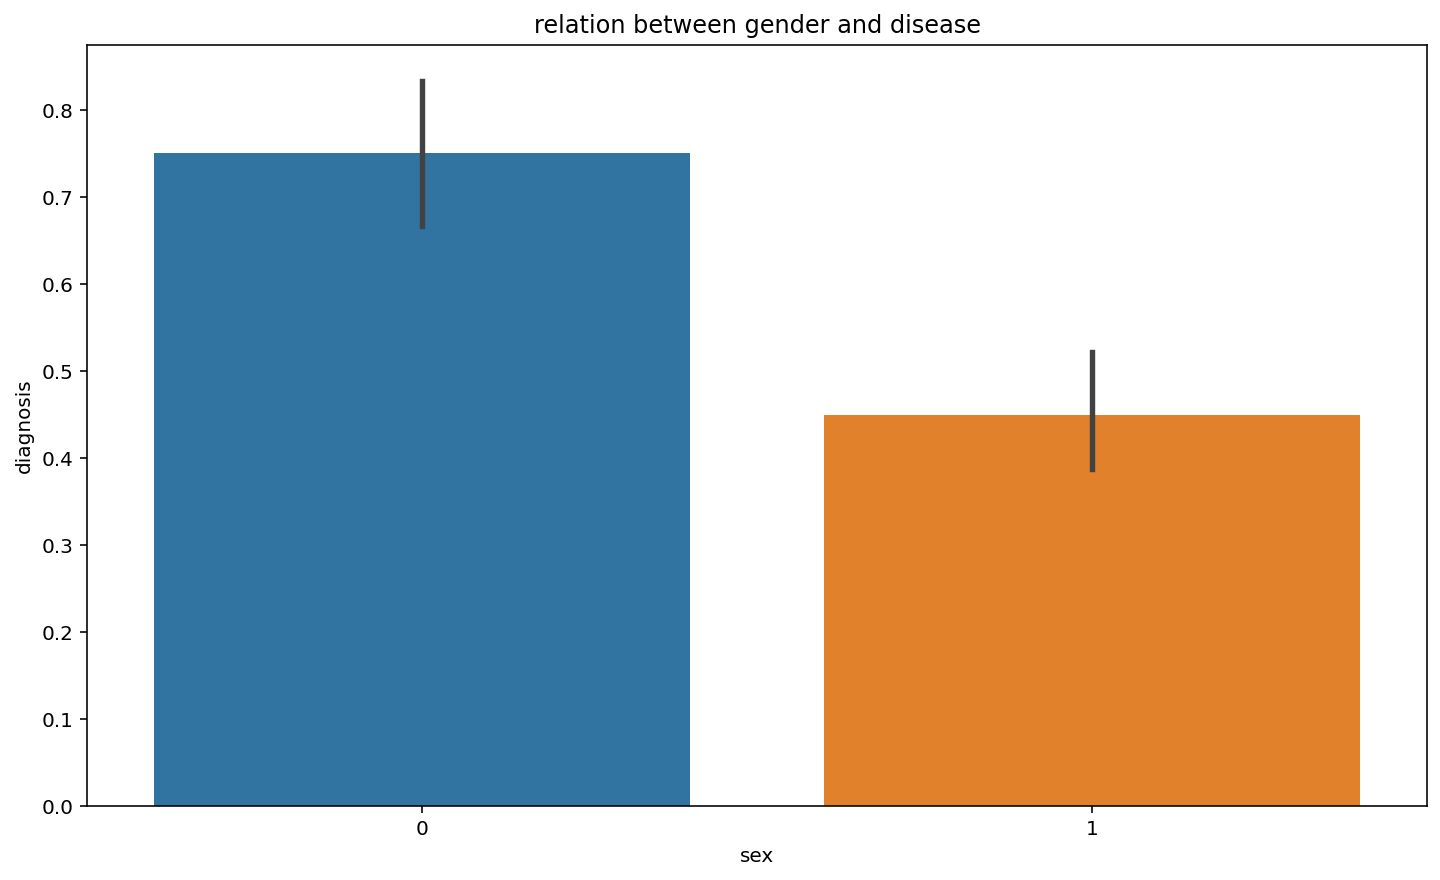

In [6]:
sns.barplot(x=df['sex'],y=df['diagnosis'])
plt.title('relation between gender and disease')

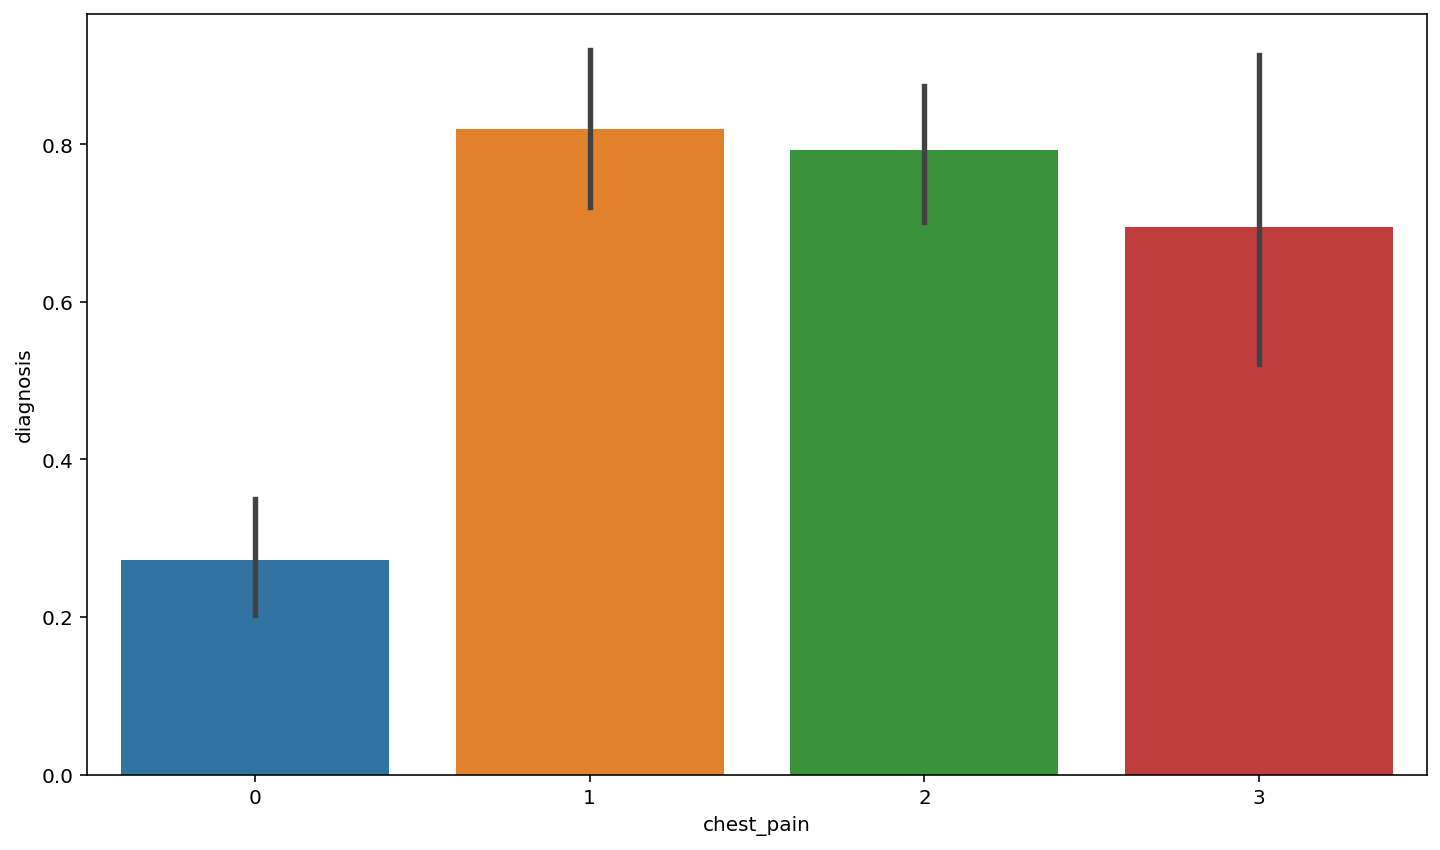

In [7]:
sns.barplot(df['chest_pain'],y)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f93997f5898>,
      dtype=object)

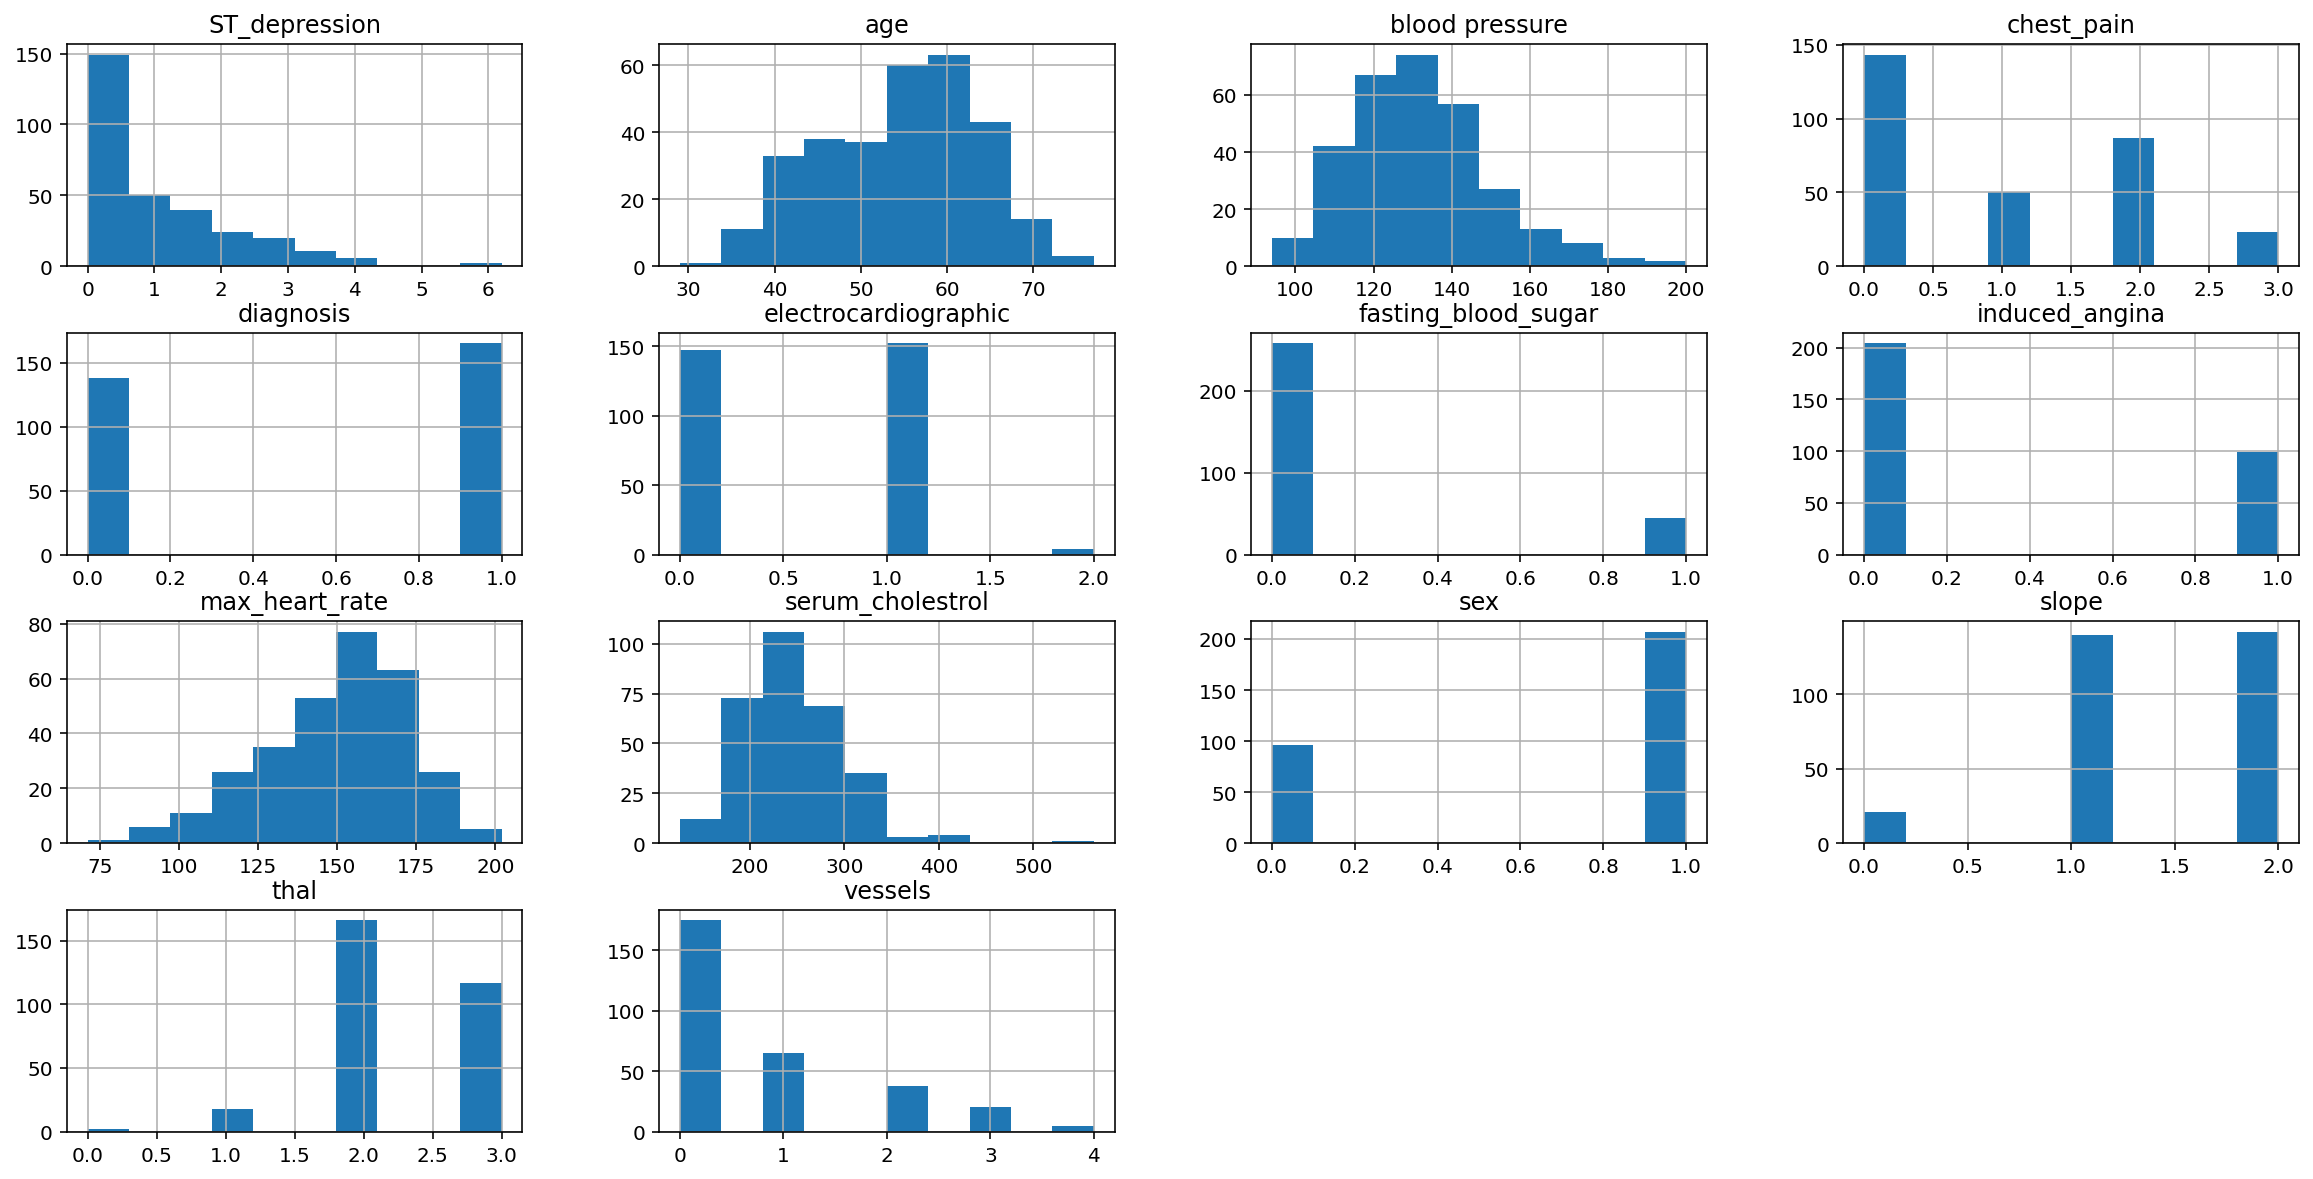

In [8]:
df.hist(figsize=(20,10))

In [9]:
categorical_val = []
continous_val = []
for column in df.columns:
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)
print(categorical_val)

['sex', 'chest_pain', 'fasting_blood_sugar', 'electrocardiographic', 'induced_angina', 'slope', 'vessels', 'thal', 'diagnosis']


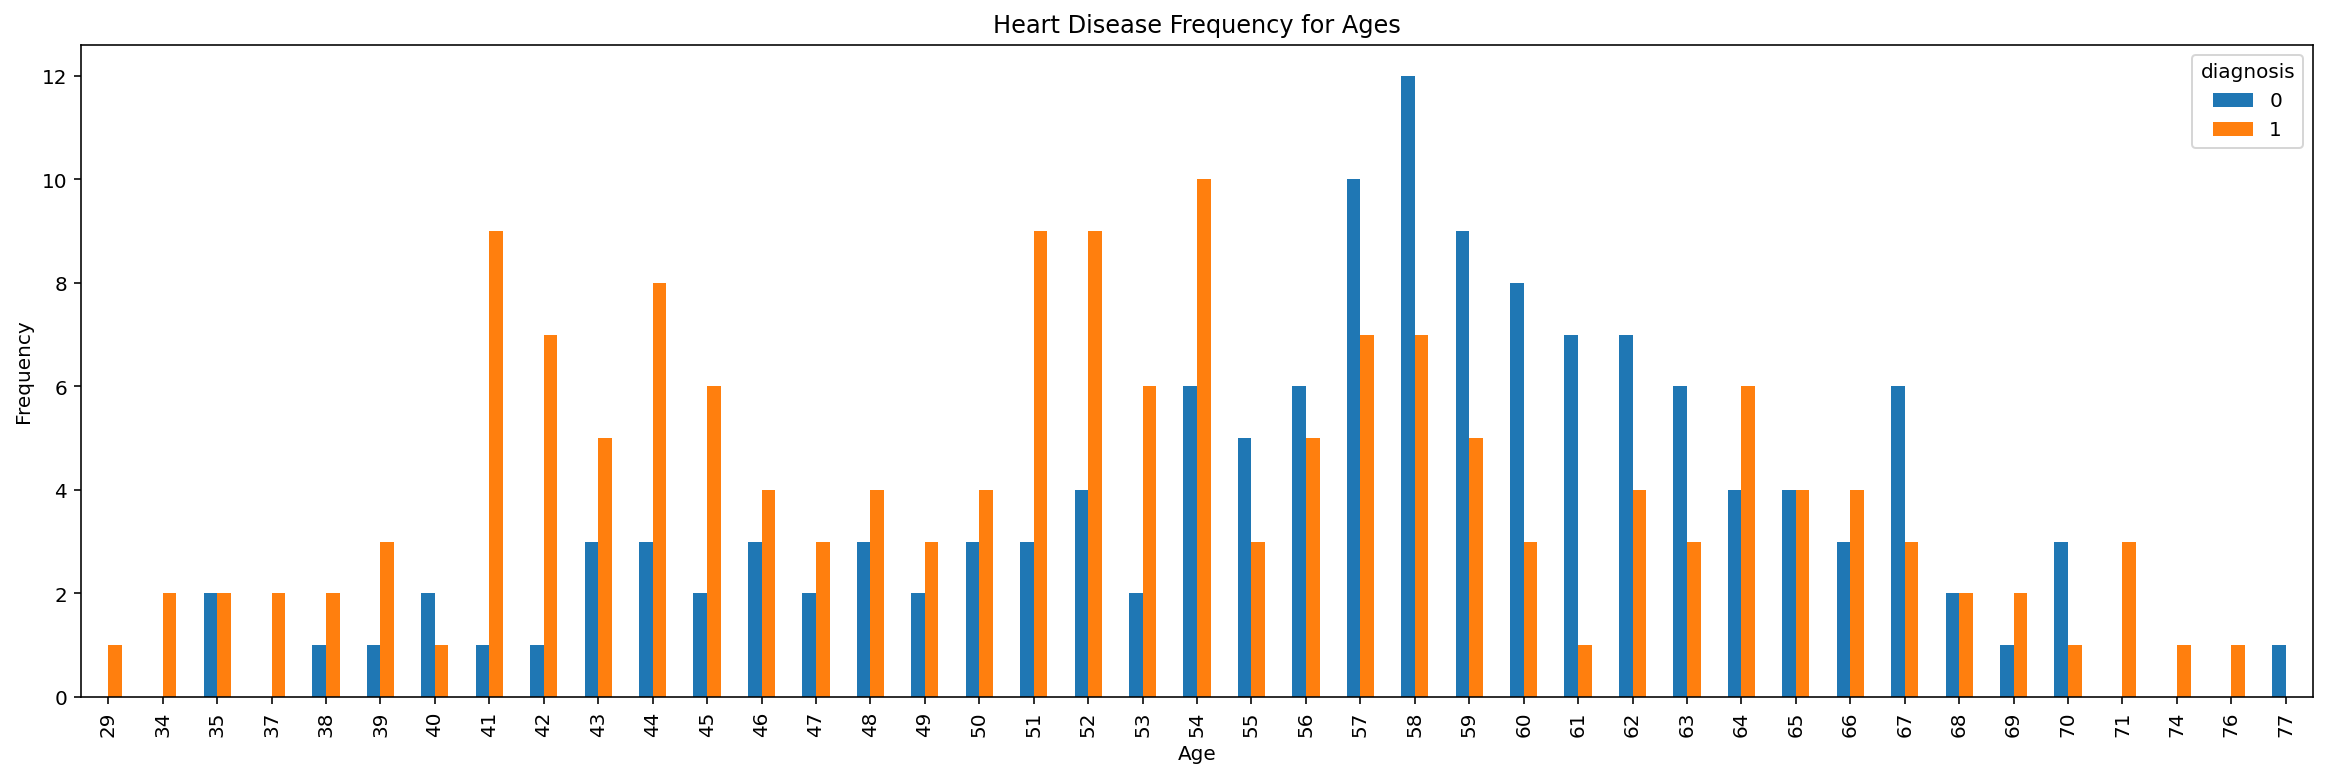

In [10]:
pd.crosstab(df.age,df.diagnosis).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

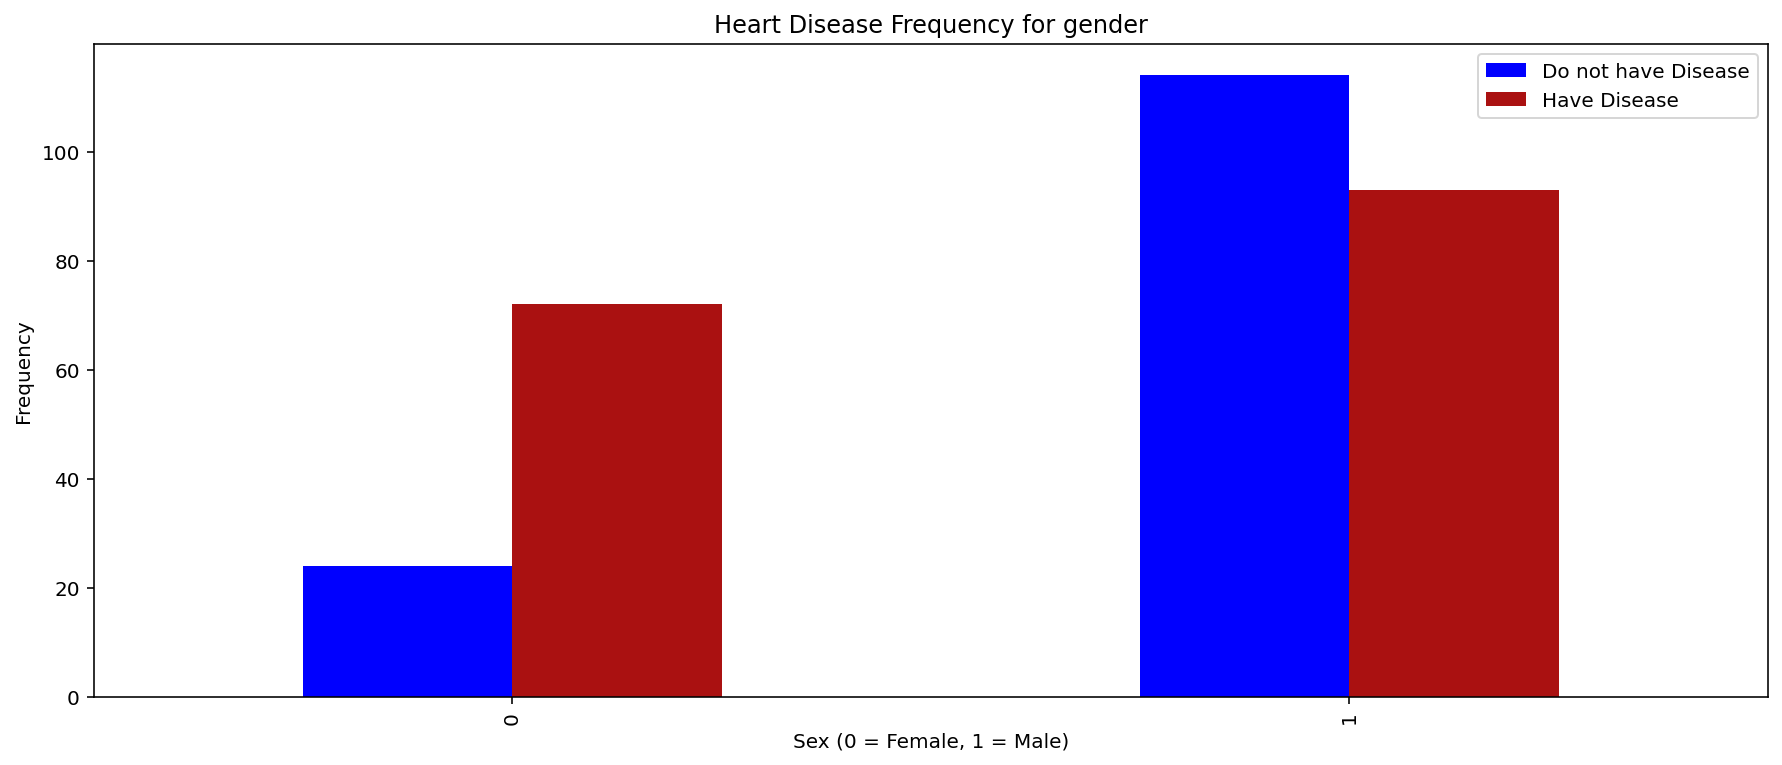

In [11]:
pd.crosstab(df.sex,df.diagnosis).plot(kind="bar",figsize=(15,6),color=['blue','#AA1111' ])
plt.title('Heart Disease Frequency for gender')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.legend(["Do not have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

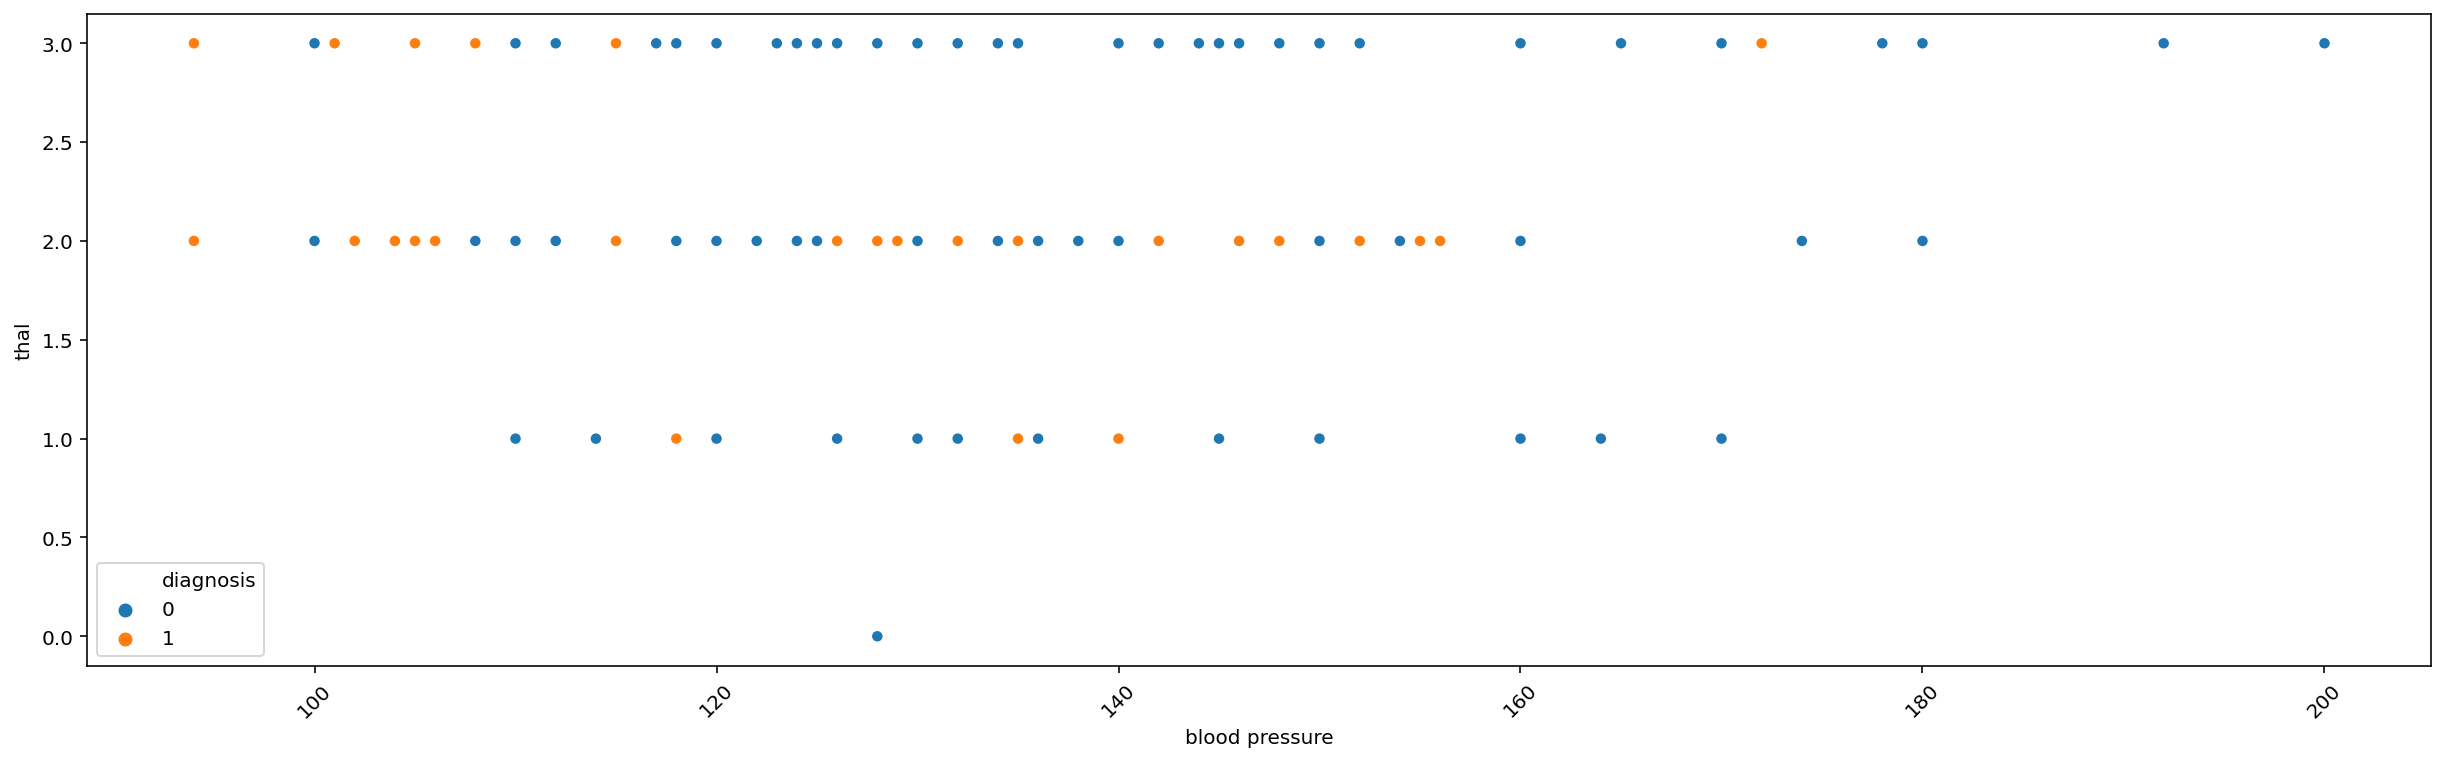

In [12]:
plt.figure(figsize=(21,6))
sns.scatterplot(x='blood pressure',y='thal',data=df,hue='diagnosis')
plt.xticks(rotation=45)
plt.show()

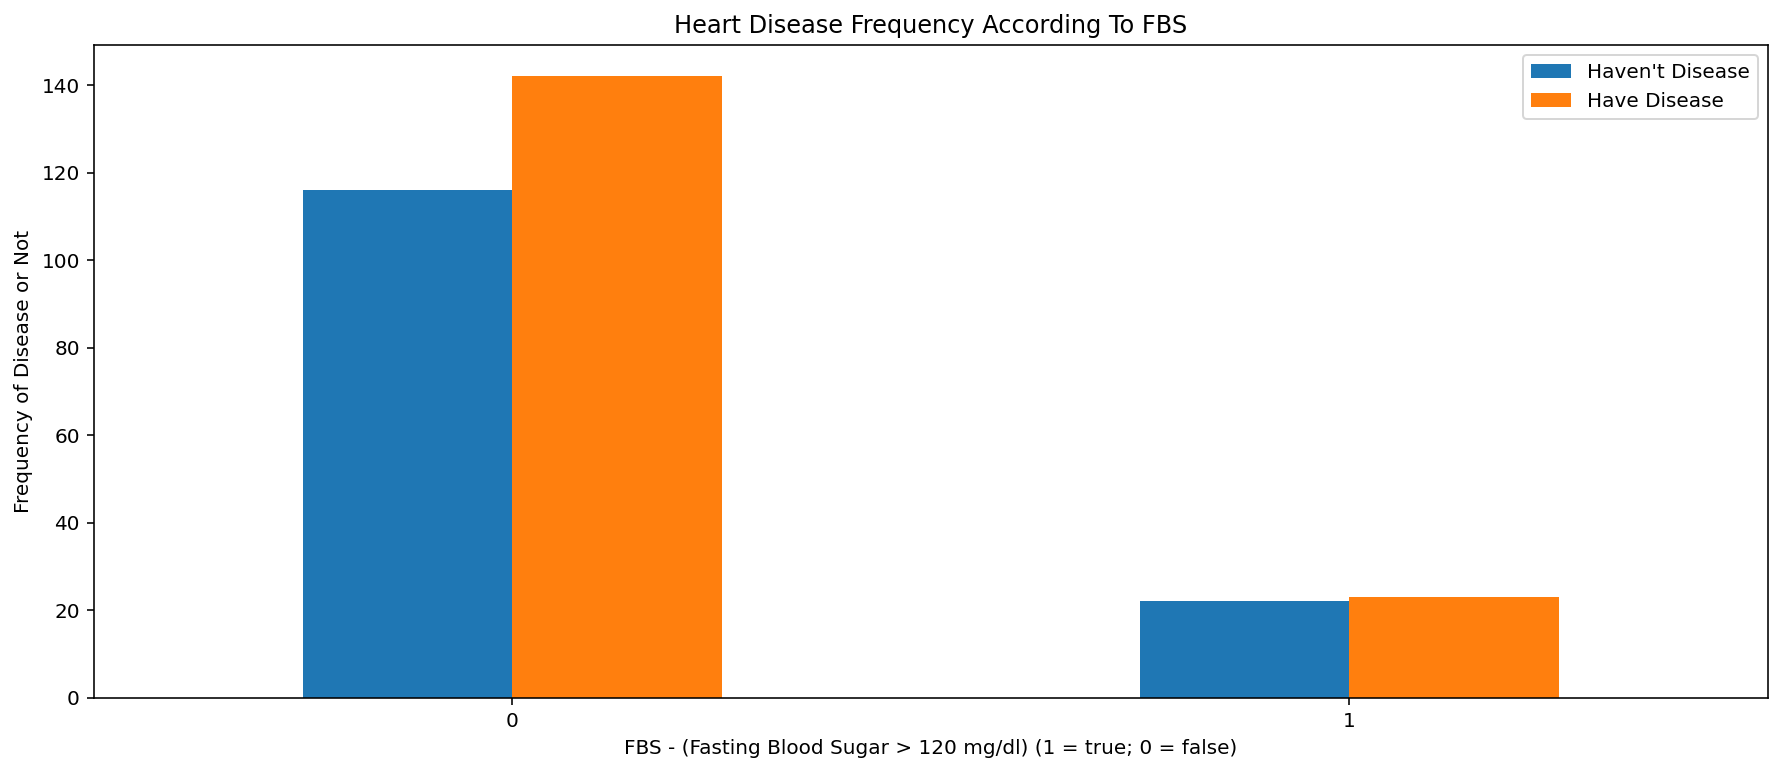

In [13]:
pd.crosstab(df.fasting_blood_sugar,df.diagnosis).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f939928f828>,
 'caps': [<matplotlib.lines.Line2D at 0x7f93981f6a20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f939928fac8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9398226390>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f93981edbe0>],
 'means': []}

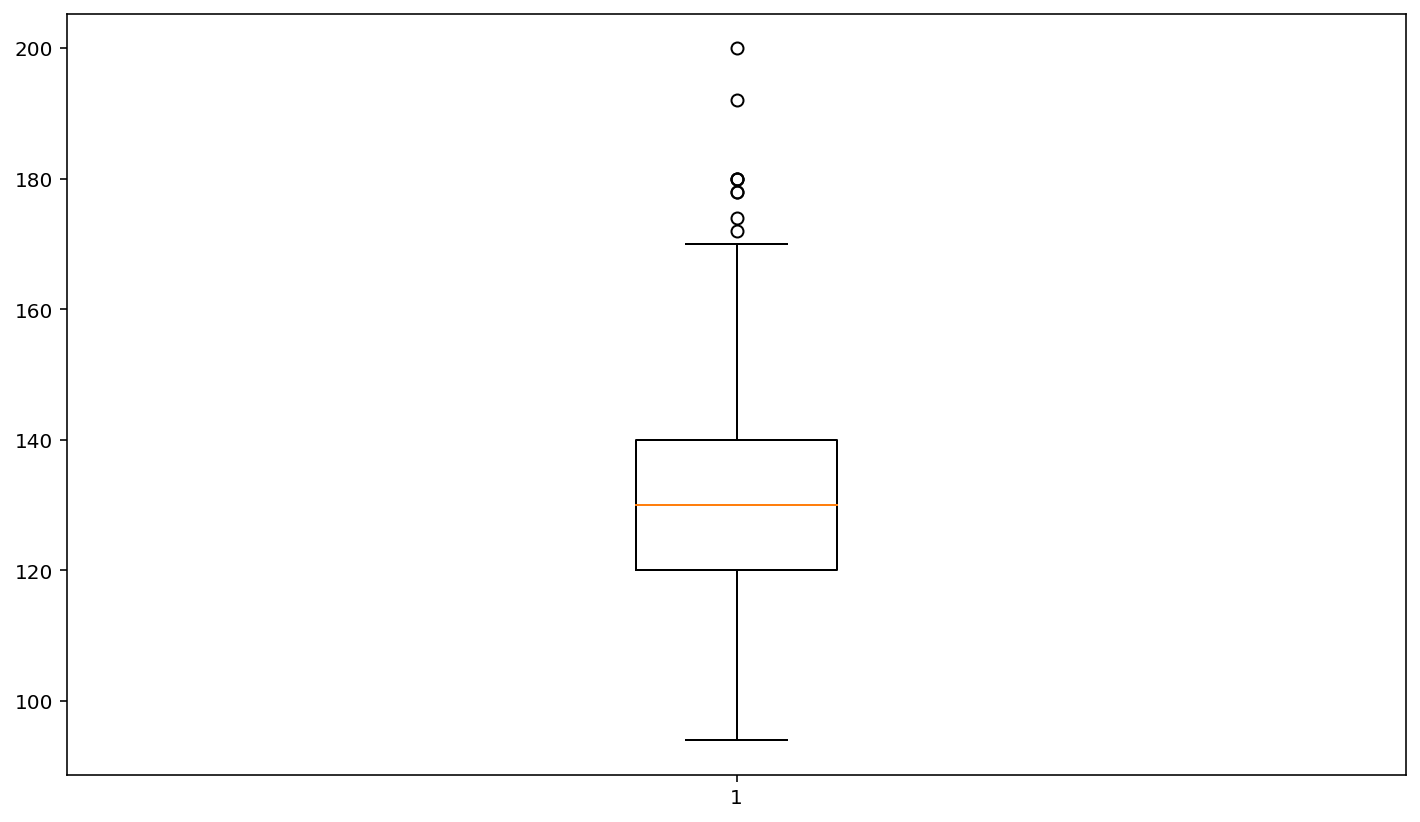

In [14]:
plt.boxplot(df['blood pressure'])

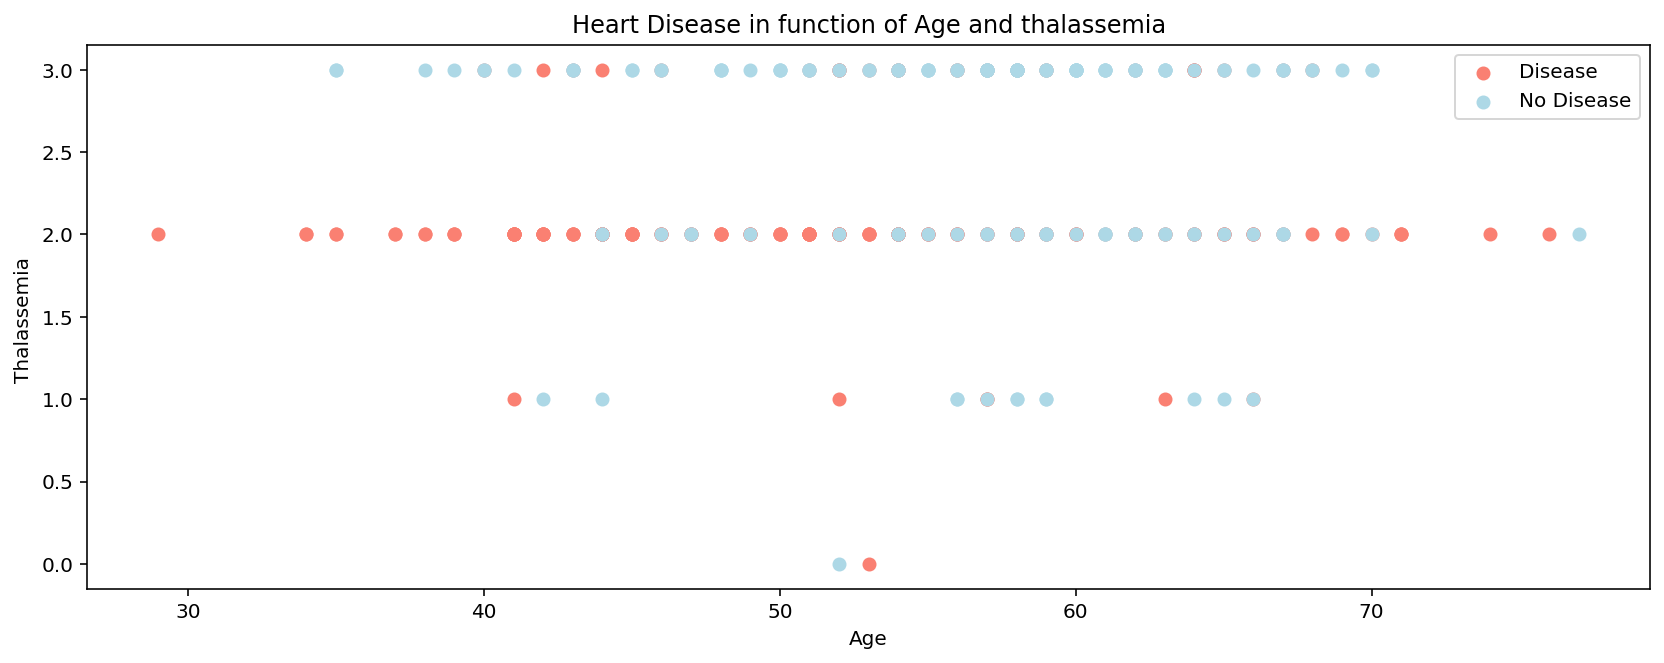

In [36]:
plt.figure(figsize=(14,5))
plt.scatter(df.age[df.diagnosis==1],
            df.thal[df.diagnosis==1],
            c="salmon")
plt.scatter(df.age[df.diagnosis==0],
            df.thal[df.diagnosis==0],
            c="lightblue")
plt.title("Heart Disease in function of Age and thalassemia")
plt.xlabel("Age")
plt.ylabel("Thalassemia ")
plt.legend(["Disease", "No Disease"])

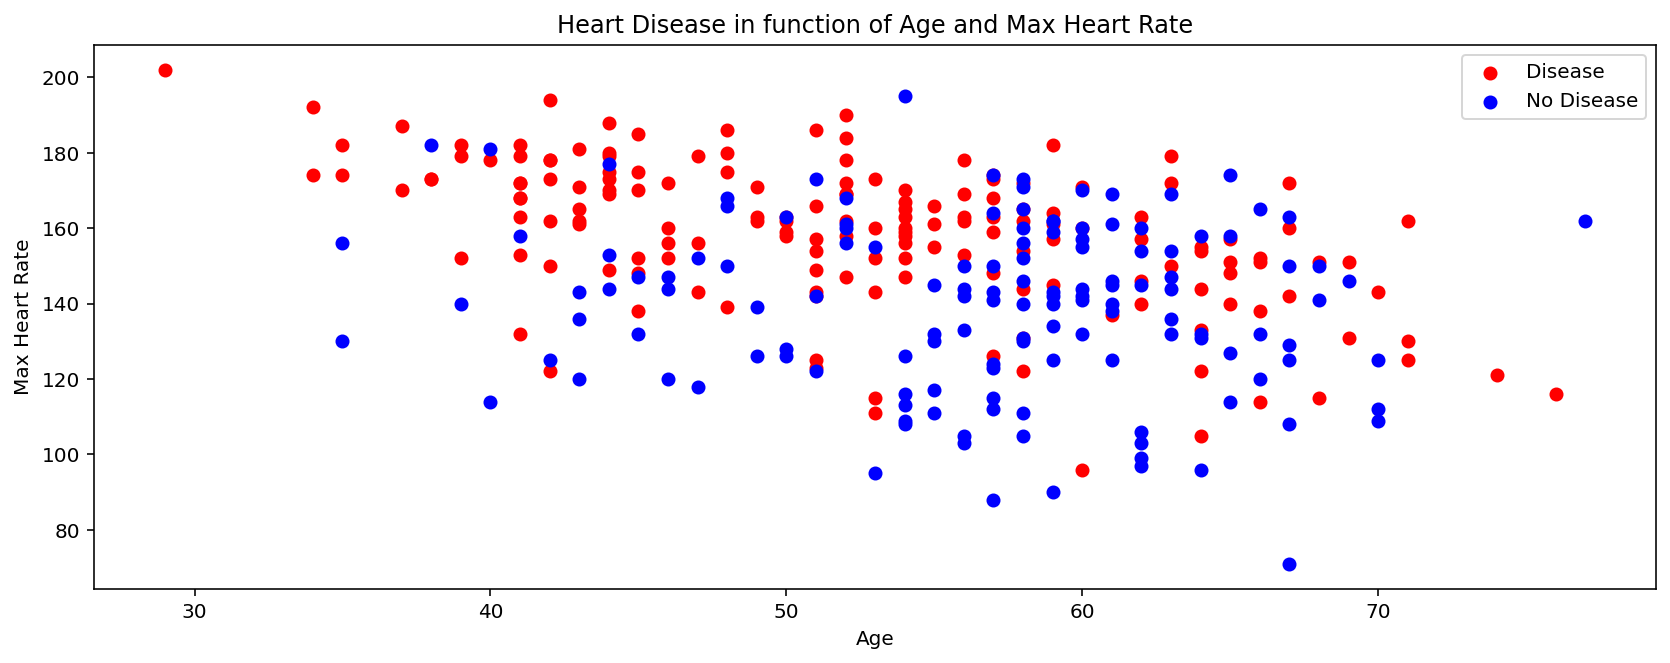

In [37]:
plt.figure(figsize=(14, 5))
plt.scatter(df.age[df.diagnosis==1],
            df.max_heart_rate[df.diagnosis==1],
            c="red")
plt.scatter(df.age[df.diagnosis==0],
            df.max_heart_rate[df.diagnosis==0],
            c="blue")
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"])

(14.5, -0.5)

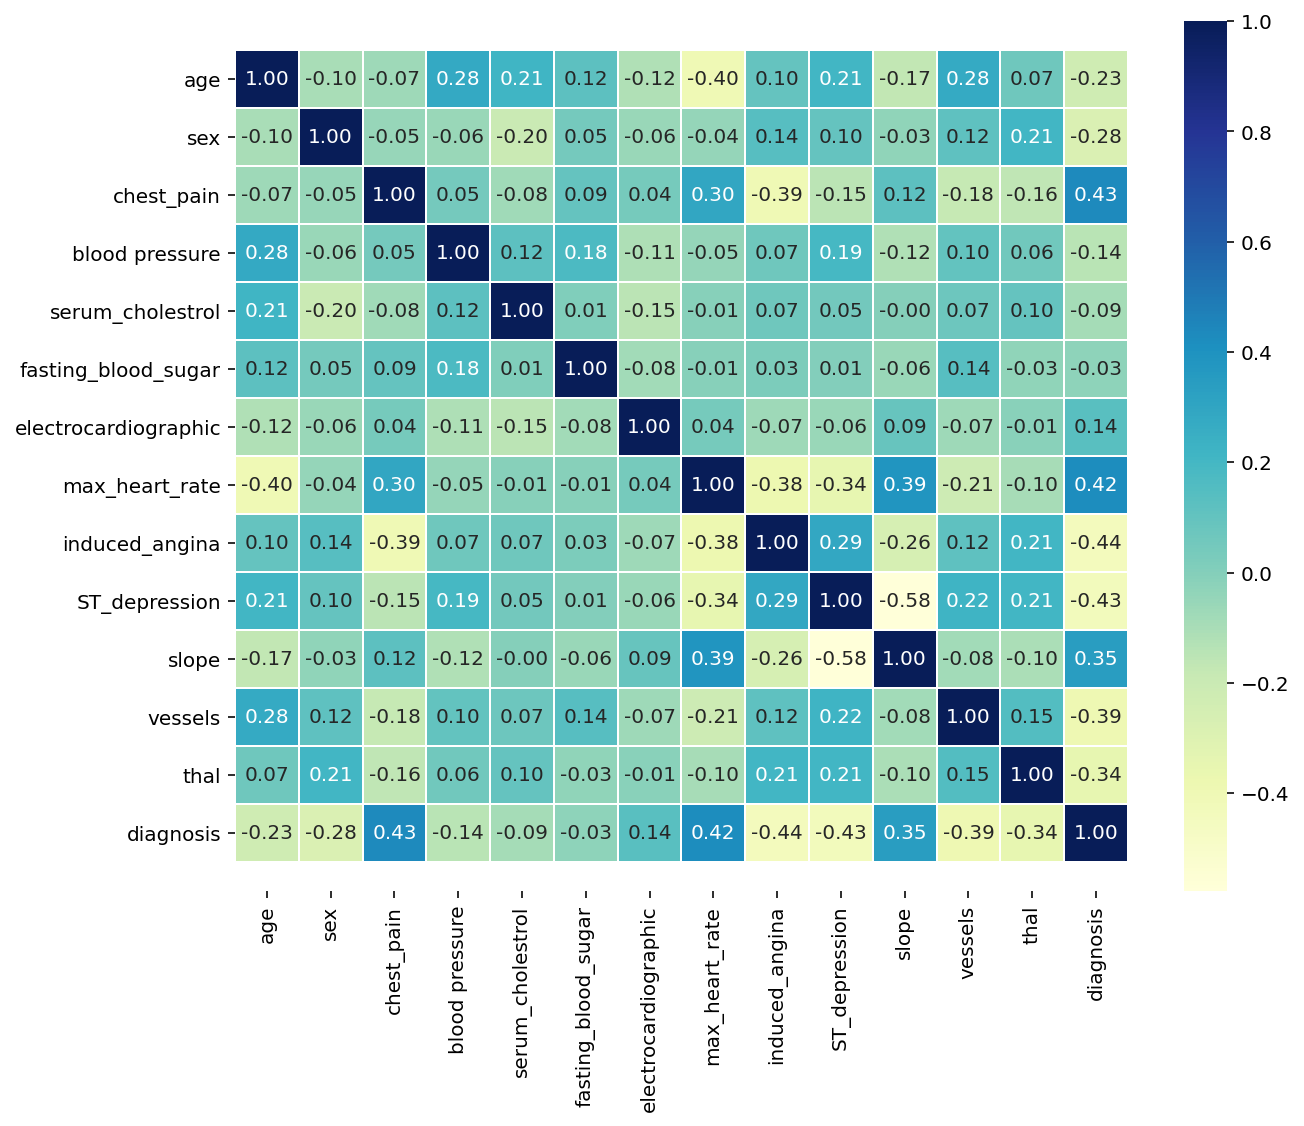

In [40]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

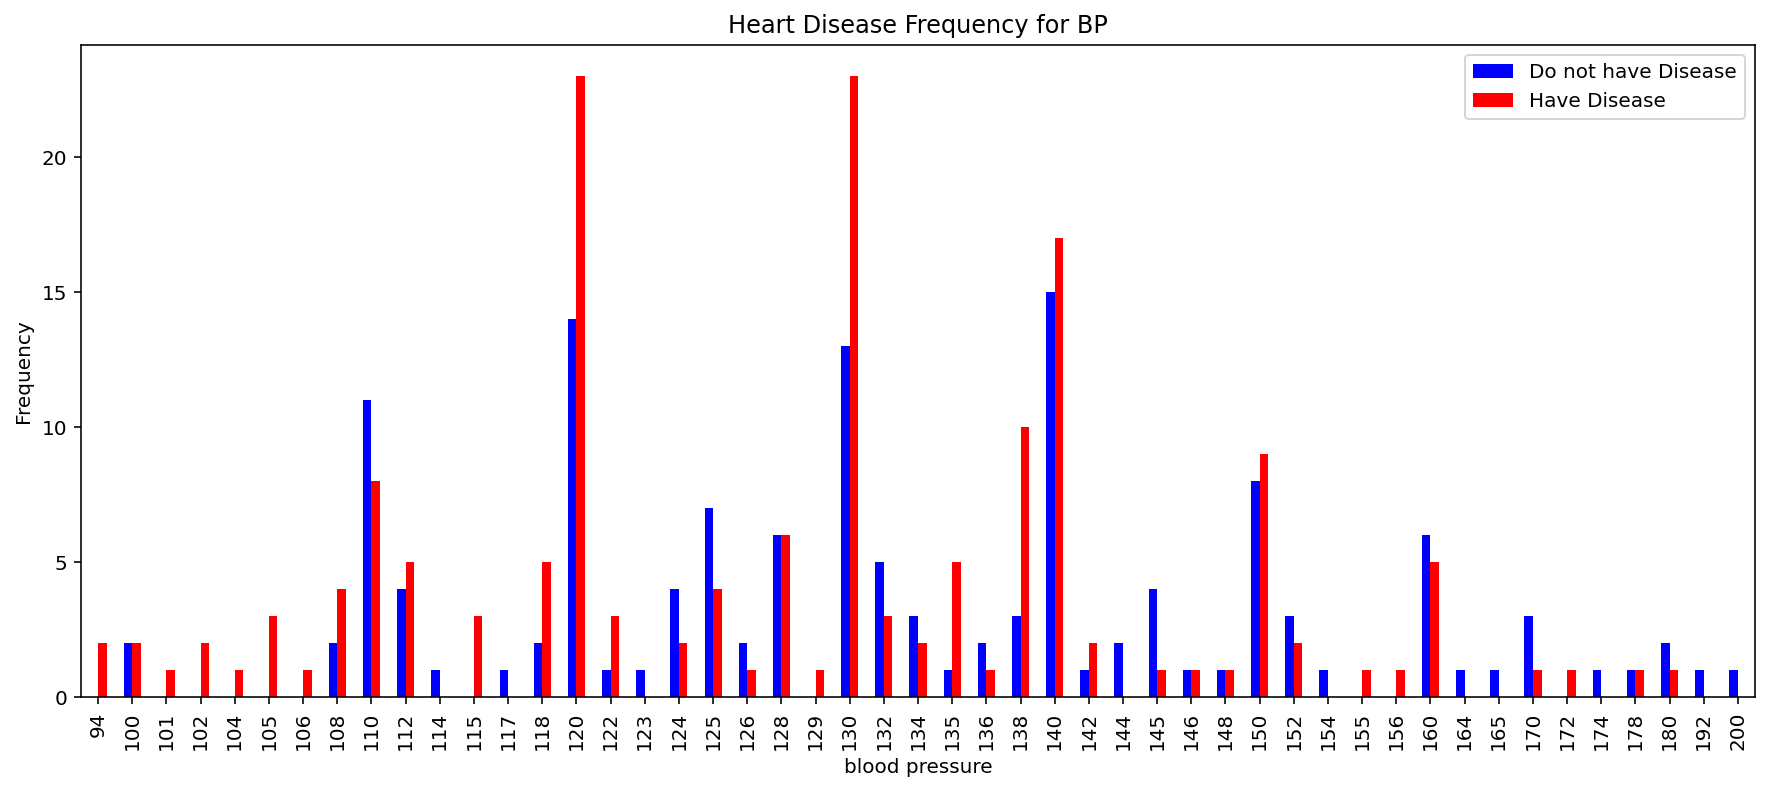

In [18]:
pd.crosstab(df['blood pressure'],df.diagnosis).plot(kind="bar",figsize=(15,6),color=['blue','red' ])
plt.title('Heart Disease Frequency for BP')
plt.xlabel('blood pressure')
plt.legend(["Do not have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [19]:
df.columns

Index(['age', 'sex', 'chest_pain', 'blood pressure', 'serum_cholestrol',
       'fasting_blood_sugar', 'electrocardiographic', 'max_heart_rate',
       'induced_angina', 'ST_depression', 'slope', 'vessels', 'thal',
       'diagnosis'],
      dtype='object')

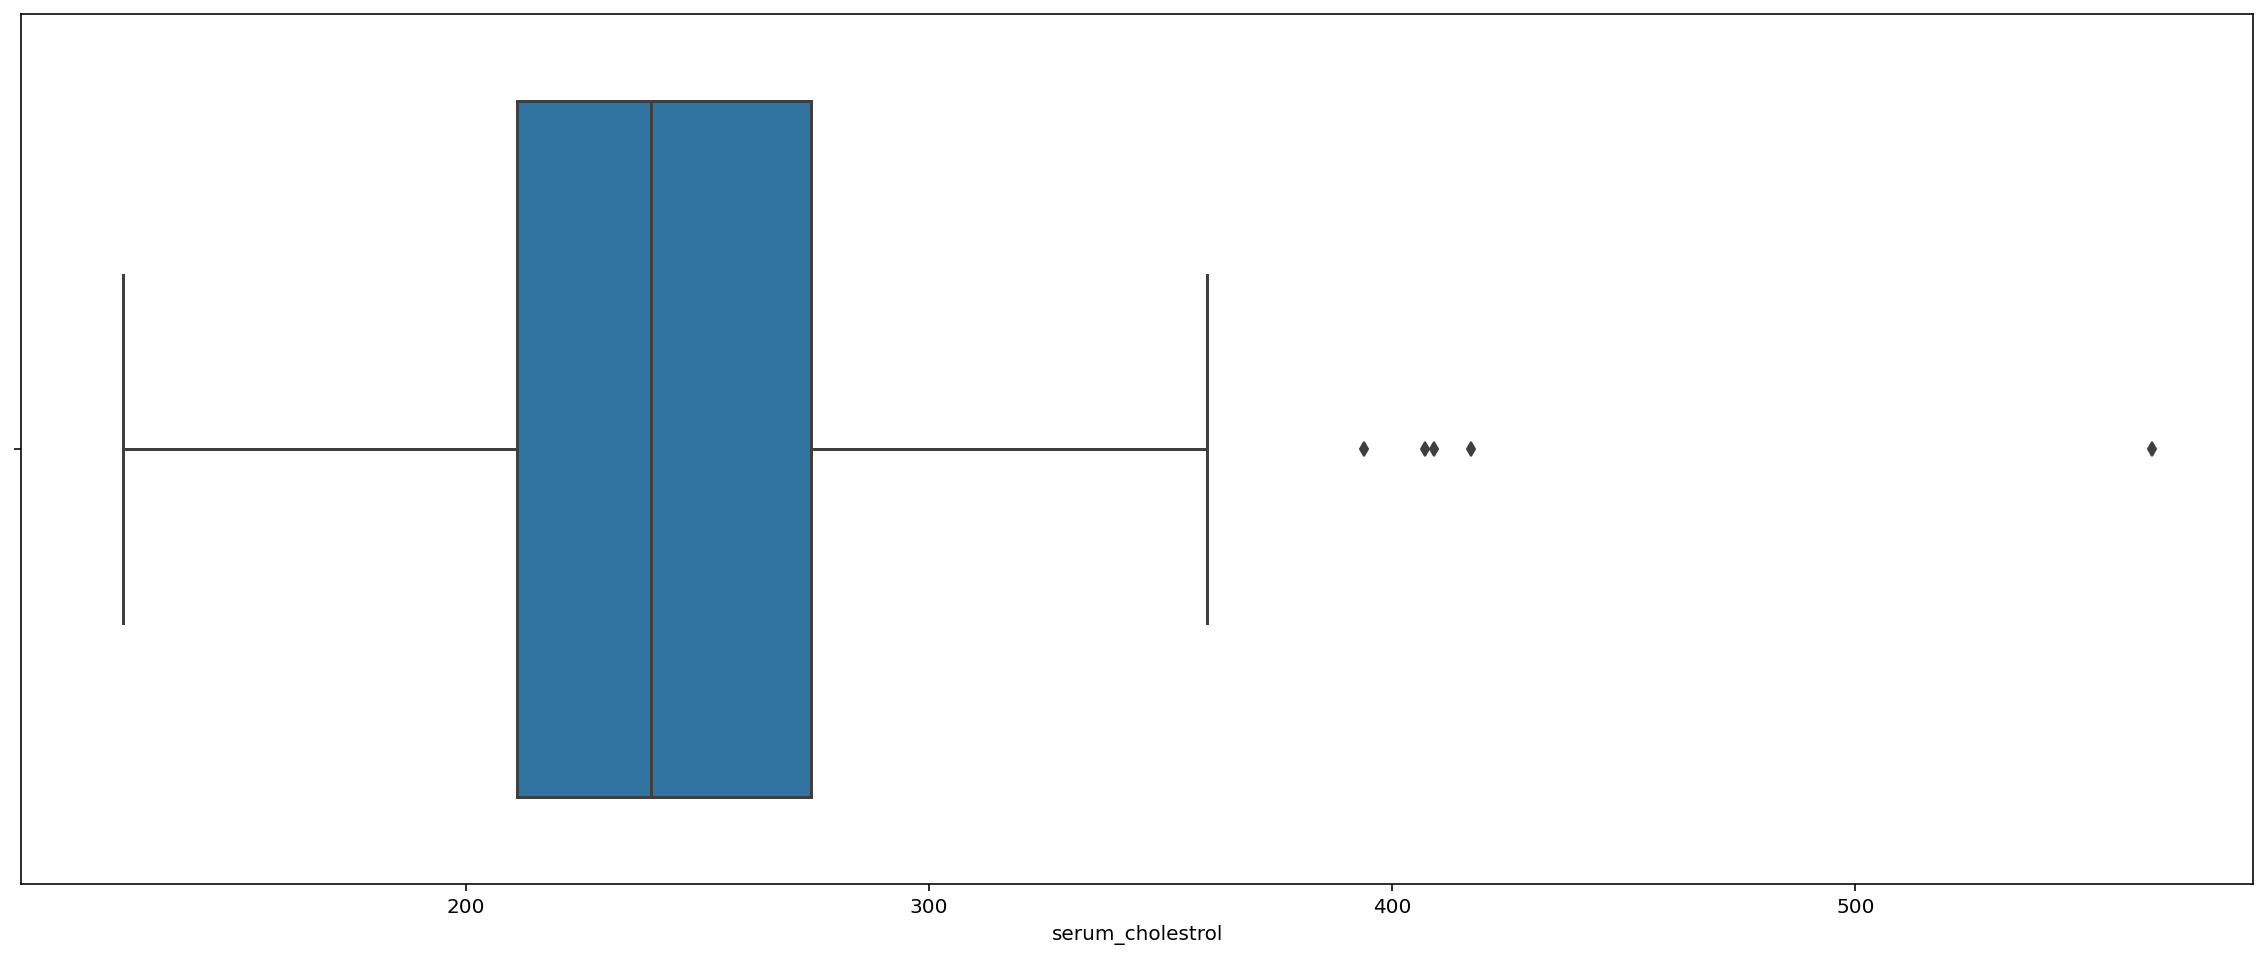

In [23]:
plt.figure(figsize=(20,8))
sns.boxplot(df['serum_cholestrol'])

In [24]:
def drop_by_std(df,factor):
    lower=df['serum_cholestrol'].mean()- df['serum_cholestrol'].std()*factor
    upper=df['serum_cholestrol'].mean() + df['serum_cholestrol'].std()*factor
    output=df[(df['serum_cholestrol']<upper) & (df['serum_cholestrol']>lower)]
    return output
df_new=drop_by_std(df,2)
df_new

,age,sex,chest_pain,blood pressure,serum_cholestrol,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,vessels,thal,diagnosis
1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
2,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
6,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
299,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
300,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
301,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0


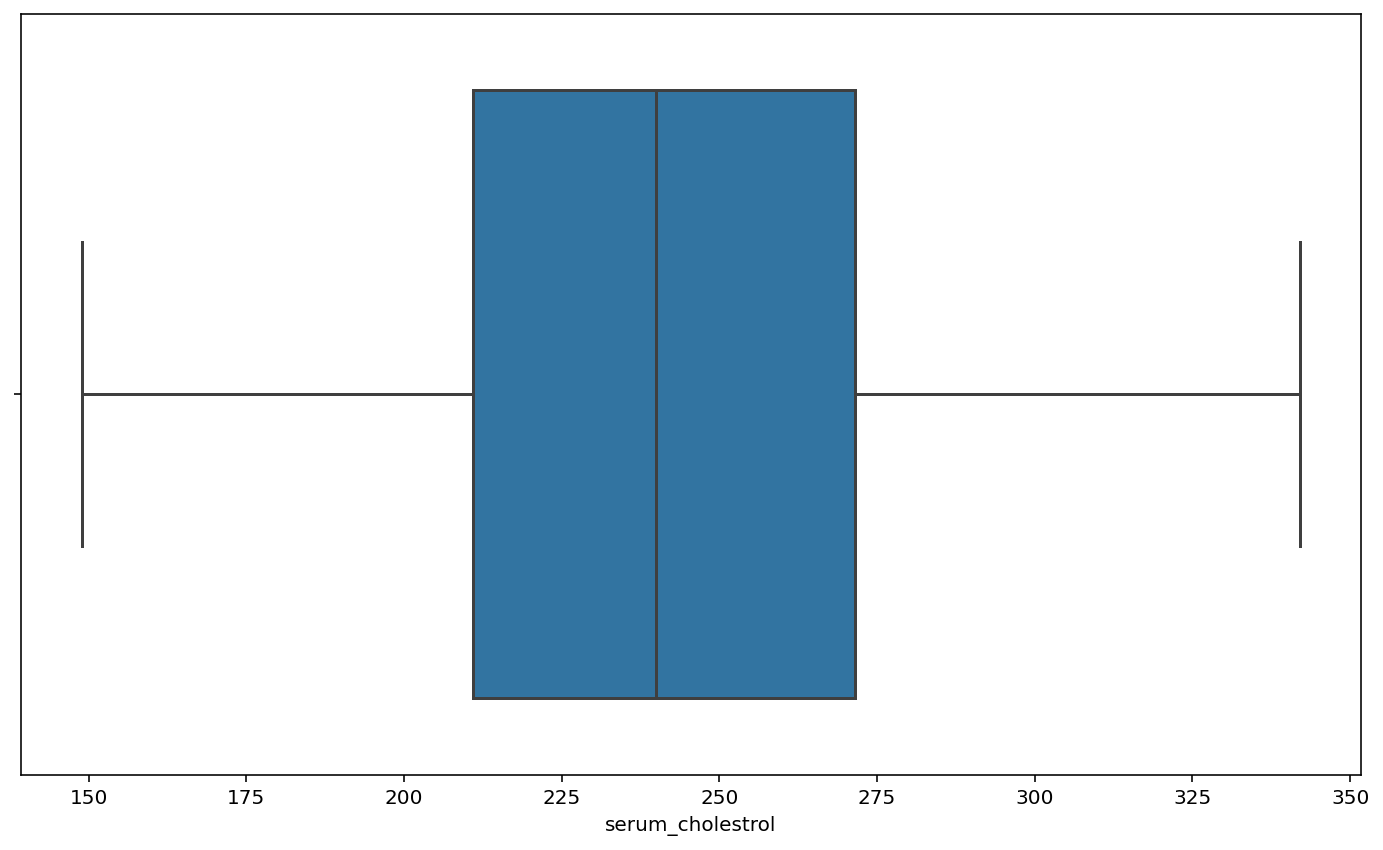

In [25]:
sns.boxplot(df_new['serum_cholestrol'])

In [26]:
def drop_by_std(df,factor):
    lower=df['blood pressure'].mean()- df['blood pressure'].std()*factor
    upper=df['blood pressure'].mean() + df['blood pressure'].std()*factor
    output=df[(df['blood pressure']<upper) & (df['blood pressure']>lower)]
    return output
df_n=drop_by_std(df,2)
df_n

,age,sex,chest_pain,blood pressure,serum_cholestrol,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,vessels,thal,diagnosis
1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
2,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
300,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
301,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
302,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


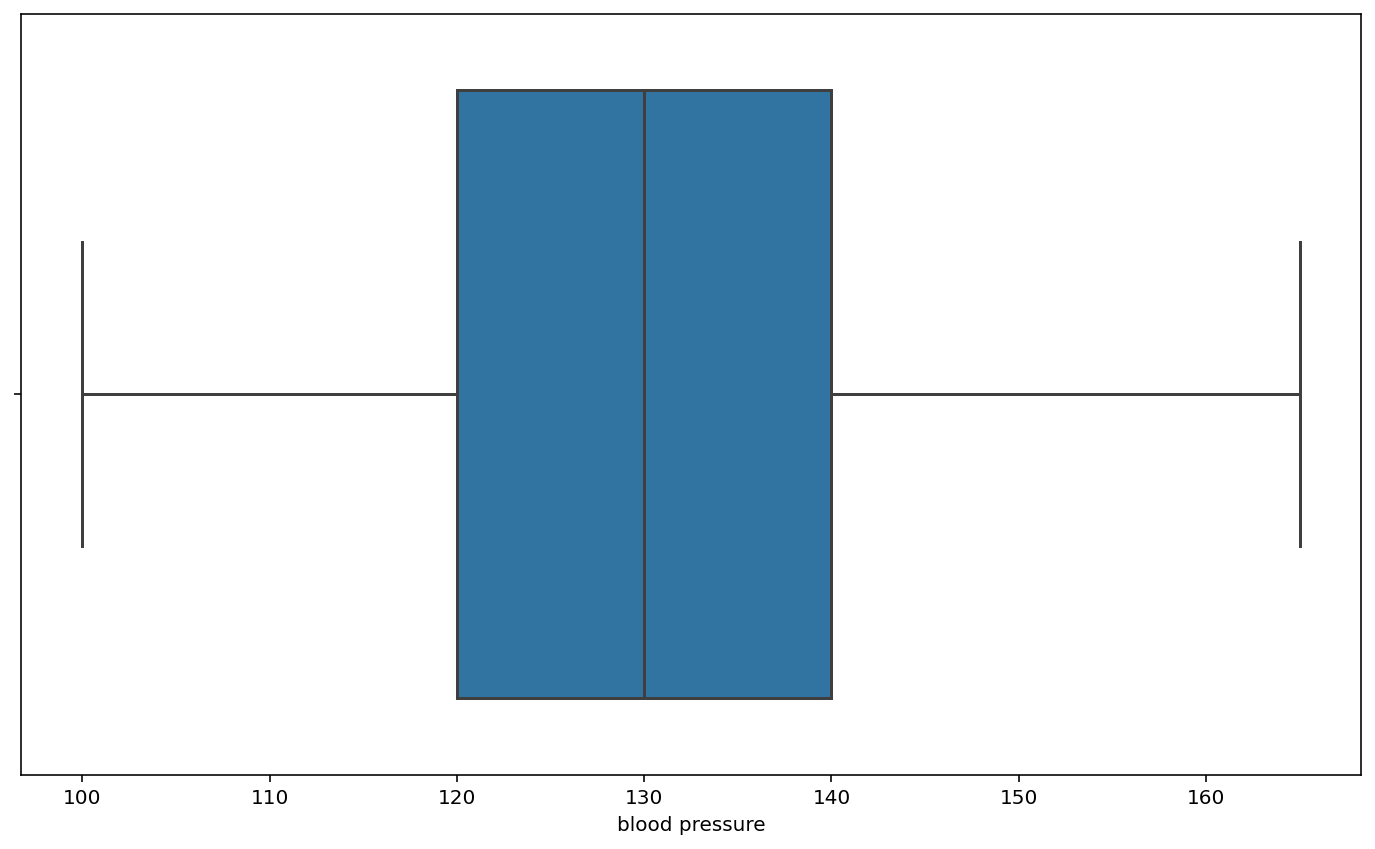

In [27]:
sns.boxplot(df_n['blood pressure'])

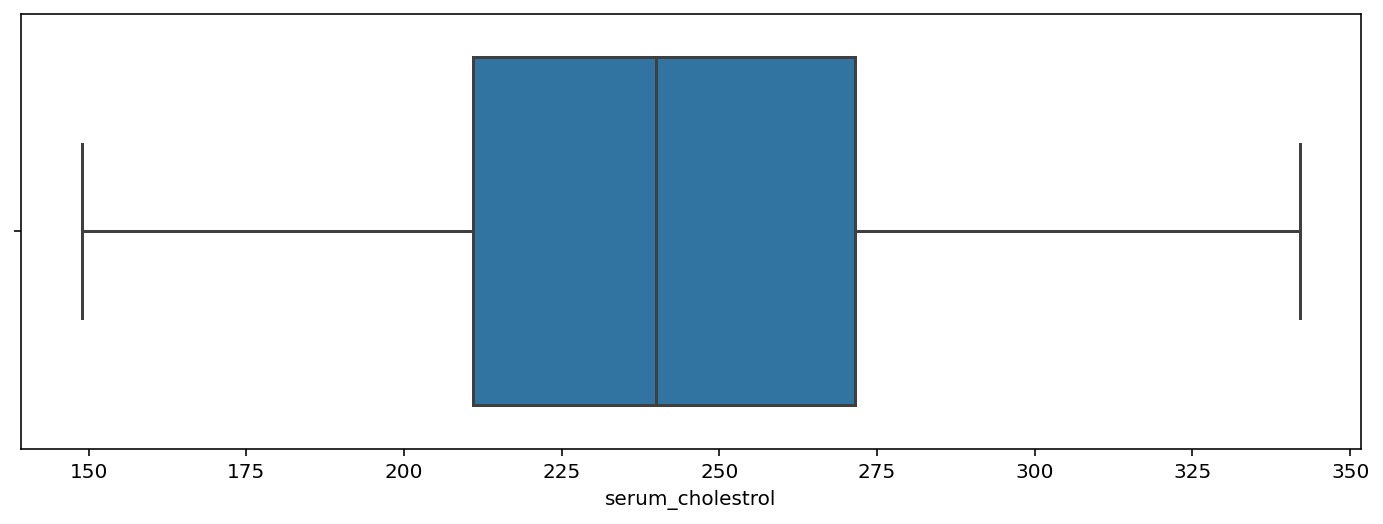

In [31]:
plt.figure(figsize=(12,4))
def drop_by_std(df,factor):
    lower=df['serum_cholestrol'].mean()- df['serum_cholestrol'].std()*factor
    upper=df['serum_cholestrol'].mean() + df['serum_cholestrol'].std()*factor
    output=df[(df['serum_cholestrol']<upper) & (df['serum_cholestrol']>lower)]
    return output
df_new=drop_by_std(df,2)
sns.boxplot(df_new['serum_cholestrol'])

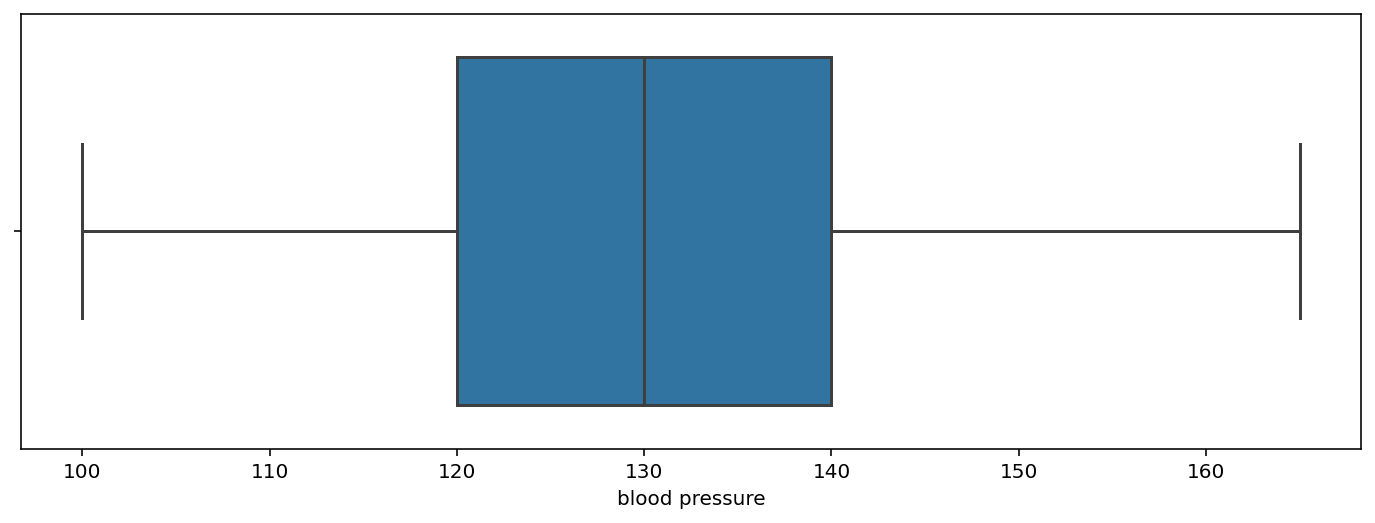

In [32]:
plt.figure(figsize=(12,4))
def drop_by_std(df,factor):
    lower=df['blood pressure'].mean()- df['blood pressure'].std()*factor
    upper=df['blood pressure'].mean() + df['blood pressure'].std()*factor
    output=df[(df['blood pressure']<upper) & (df['blood pressure']>lower)]
    return output
df_n=drop_by_std(df,2)
sns.boxplot(df_n['blood pressure'])

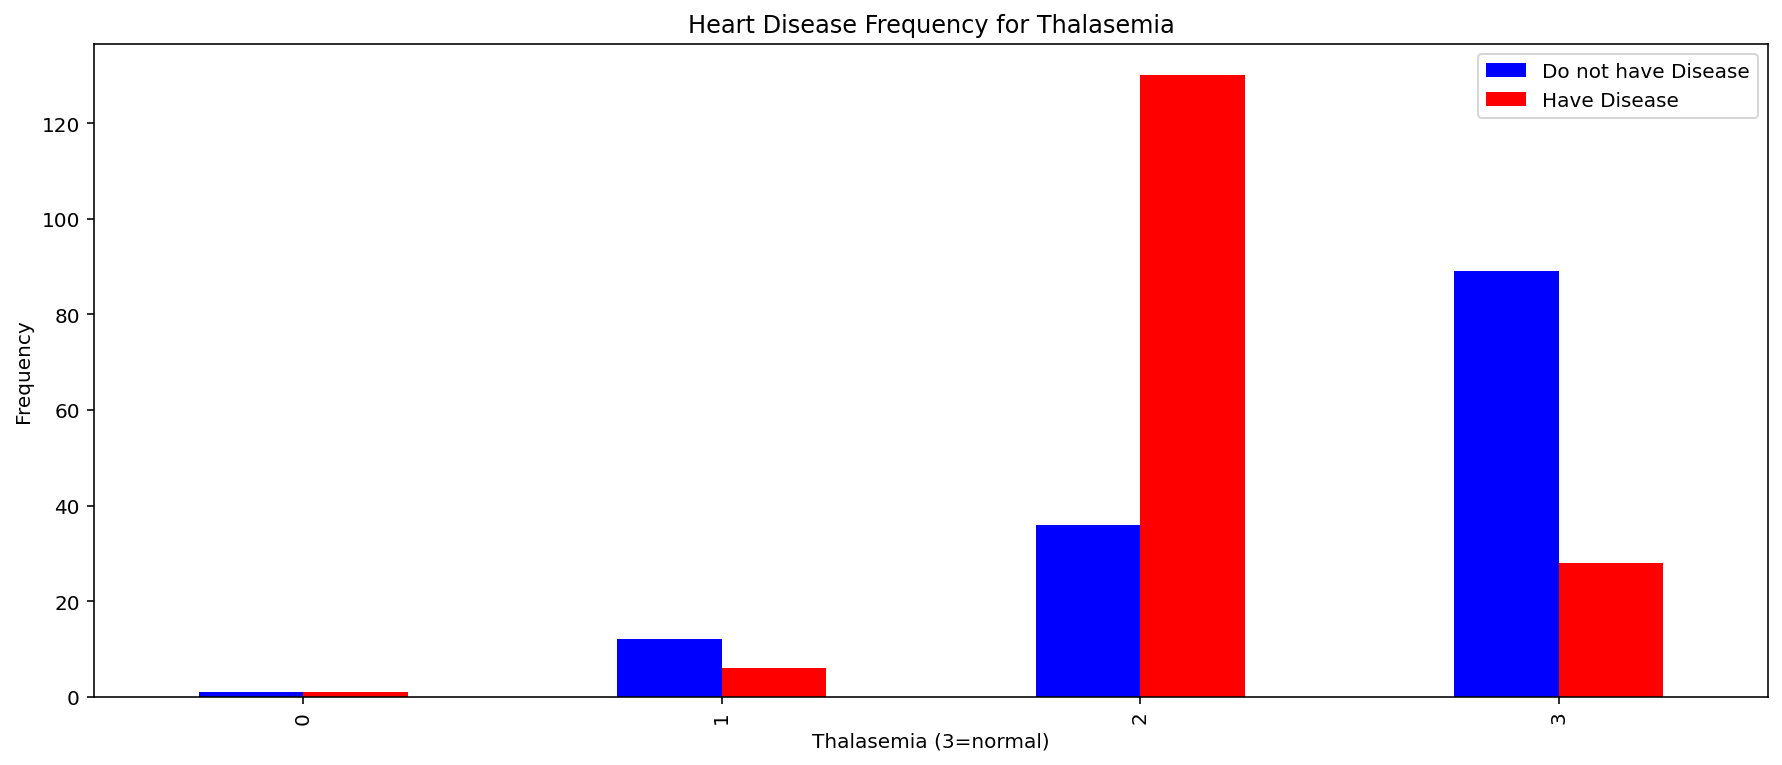

In [35]:
pd.crosstab(df.thal,df.diagnosis).plot(kind="bar",figsize=(15,6),color=['blue','red' ])
plt.title('Heart Disease Frequency for Thalasemia')
plt.xlabel('Thalasemia (3=normal)')
plt.legend(["Do not have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()